# 우선 testdata를 만들고 loader에 넣기 위해 test 데이터를 만들어줍니다.
## 이때 유의할 점을 test폴더를 또다른 폴더 안에 넣고 imagefolder에 넣어줘야한다는 것입니다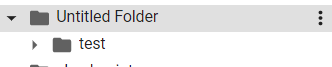

위처럼 test폴더를 만들었다면 아래와 같이 test loader를 지정합니다 무조건 shuffle은 false로 두셔야합니다

In [ ]:
test = CustomImageFolder("/content/test",transform=alb_valid_transform)
test_loader = DataLoader(test,shuffle=False,batch_size=32,num_workers=2) 

lightning에서 model checkpoint를 사용하시는 분들은 ckpt에서 모델을 불러와 결과를 내는법을 따로 알려드리겠습니다 연락주세요
그외에 일반 pytorch라면 모델에 test data를 통과시킵니다.

In [ ]:
model.eval()
prediction = []
for i, data in enumerate(test_loader):
  images,label =data
  outputs = model(images)
  _, predicted = torch.max(outputs.data, 1)
  predicted_list=predicted.tolist()
  prediction.append(predicted_list) 
  #print(predicted)
prediction = sum(prediction,[])

In [ ]:
import csv
with open('submission.csv','w') as file :

    write = csv.writer(file)
    write.writerow(prediction)

#위에서 생겨난 csv를 저에게 제출해주시면됩니다
팀당 최대 3개의 csv를 받겠습니다 어떤 모델이 가장 좋은지 잘 판단하여 전해주시길 바랍니다.